# Managing Data

Here we will give examples of managing GIS data.

In [1]:
import matplotlib.pyplot as plt
from pyhera.hera import GIS

dataHandler = GIS.GIS_datahandler(projectName = "Examples", FilesDirectory = "/home/ofir/tmp/BNTL-HAIFA")

The GIS_datahandler class helps managing GIS data. 
The class requires a project name and a directory path in which to save new files.

## Getting and adding Data

Getting data is done using a function called getGISdata.
This function may load existing data, or add new data if the requested data isn't available.

In order to create a new file and a corresponding document in the database,
two parameters must be given to the function.
The first is called points, and it holds the ITM coordinates of a rectangle.
It is a list, from the structure [minimum x, minimum y, maximum x, maximum y].
The second is called CutName, and it is used as part of the new file's name.

Any other parameters can be given as descriptors of the data.
In the next example a parameter named Region is defined.

In [2]:
points = [193000, 731000, 218500, 763000]
example_data = dataHandler.getGISData(points=points, CutName="Example", Region="Haifa")
example_data[:10]

,FCODE,FTYPE,HEIGHT,ORIG_LEN,SHAPE_Leng,geometry
0,611,10,0,19938.695735,19938.695735,"LINESTRING (207394.358 763000.000, 207392.793 ..."
1,611,10,0,42.973966,42.973966,"LINESTRING (207161.130 760600.113, 207160.685 ..."
2,611,10,0,86.598621,86.598621,"LINESTRING (207363.937 760392.098, 207366.788 ..."
3,611,11,5,33452.888982,33452.888982,"LINESTRING (195706.140 740000.000, 195699.475 ..."
4,611,11,5,380.349931,380.349931,"LINESTRING (207060.154 740000.000, 207064.209 ..."
5,611,11,5,129.627380,129.627380,"LINESTRING (207004.017 739924.000, 207002.902 ..."
6,611,11,5,12.104079,12.104079,"LINESTRING (208512.131 740000.000, 208508.487 ..."
7,611,11,5,100.395797,100.395797,"LINESTRING (206933.499 739797.454, 206932.739 ..."
8,611,11,5,54.094820,54.094820,"LINESTRING (207074.941 739808.000, 207073.838 ..."
9,611,11,5,63.664270,63.664270,"LINESTRING (207287.833 739771.791, 207287.640 ..."


The data is loaded as a geopandas dataframe.

Now that the new project contains data, the data can be loaded by addressing its descriptors.
Using the getGISdata without any parameters will return all the documents in the project.
In the next example, we will load all the data that holds the region Haifa.

In [3]:
example_data = dataHandler.getGISData(Region="Haifa")
example_data[:10]

,FCODE,FTYPE,HEIGHT,ORIG_LEN,SHAPE_Leng,geometry
0,611,10,0,19938.695735,19938.695735,"LINESTRING (207394.358 763000.000, 207392.793 ..."
1,611,10,0,42.973966,42.973966,"LINESTRING (207161.130 760600.113, 207160.685 ..."
2,611,10,0,86.598621,86.598621,"LINESTRING (207363.937 760392.098, 207366.788 ..."
3,611,11,5,33452.888982,33452.888982,"LINESTRING (195706.140 740000.000, 195699.475 ..."
4,611,11,5,380.349931,380.349931,"LINESTRING (207060.154 740000.000, 207064.209 ..."
5,611,11,5,129.627380,129.627380,"LINESTRING (207004.017 739924.000, 207002.902 ..."
6,611,11,5,12.104079,12.104079,"LINESTRING (208512.131 740000.000, 208508.487 ..."
7,611,11,5,100.395797,100.395797,"LINESTRING (206933.499 739797.454, 206932.739 ..."
8,611,11,5,54.094820,54.094820,"LINESTRING (207074.941 739808.000, 207073.838 ..."
9,611,11,5,63.664270,63.664270,"LINESTRING (207287.833 739771.791, 207287.640 ..."


If we would write a region that doesn't appear in the database we will get an error,
and the program would ask for points and a CutName for the new data.

In [4]:
example_data = dataHandler.getGISData(Region="haifa")

KeyError: 'Could not find data. Please insert points and CutName for making new data.'

## GIS Data Types

The data we have loaded so far contains contour lines.
The data can be easily plotted, as demonstrated below.

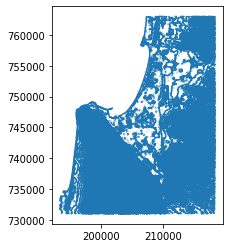

In [5]:
example_data.plot()
plt.show()

The contour lines data is the default data mode.
The package supports two more types of data, which present buildings and roads.
The two data types are presented below.

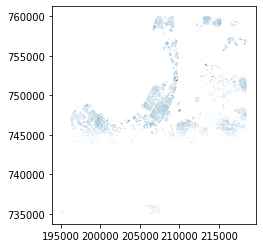

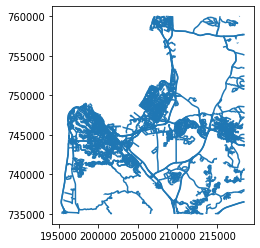

In [6]:
points = [193000, 735000, 218500, 760000]
example_buildings = dataHandler.getGISData(points=points, CutName="Example", Region="Haifa", mode="Buildings")
example_roads = dataHandler.getGISData(points=points, CutName="Example", Region="Haifa", mode="Roads")
example_buildings.plot()
example_roads.plot()
plt.show()

The data type is saved as one of the descriptors, called 'mode', and can be used for querying data.
In the next example we would load all the contour data in the project.

In [7]:
example_contour = dataHandler.getGISData(mode="Contour")
example_contour[:10]

,FCODE,FTYPE,HEIGHT,ORIG_LEN,SHAPE_Leng,geometry
0,611,10,0,19938.695735,19938.695735,"LINESTRING (207394.358 763000.000, 207392.793 ..."
1,611,10,0,42.973966,42.973966,"LINESTRING (207161.130 760600.113, 207160.685 ..."
2,611,10,0,86.598621,86.598621,"LINESTRING (207363.937 760392.098, 207366.788 ..."
3,611,11,5,33452.888982,33452.888982,"LINESTRING (195706.140 740000.000, 195699.475 ..."
4,611,11,5,380.349931,380.349931,"LINESTRING (207060.154 740000.000, 207064.209 ..."
5,611,11,5,129.627380,129.627380,"LINESTRING (207004.017 739924.000, 207002.902 ..."
6,611,11,5,12.104079,12.104079,"LINESTRING (208512.131 740000.000, 208508.487 ..."
7,611,11,5,100.395797,100.395797,"LINESTRING (206933.499 739797.454, 206932.739 ..."
8,611,11,5,54.094820,54.094820,"LINESTRING (207074.941 739808.000, 207073.838 ..."
9,611,11,5,63.664270,63.664270,"LINESTRING (207287.833 739771.791, 207287.640 ..."


## Managing Geometry Shapes Database

Other kinds of data that are usefull to save in the database are points and polygons.
It is usefull to save the coordinates of known locations such as cities or points of interest.

In order to add a new location to the database, use the addGeometry function.
The function must receive an unused name for the new location, and the location itself.

A point can be induced either as a shapely.geometry.Point or a list.

In [8]:
from shapely import geometry

Haifa_Port = geometry.Point([200000,748000])
# Haifa_Port = [200000,748000] this syntax would work as well.

dataHandler.addGeometry(name="Haifa_Port", Geometry=Haifa_Port)

KeyError: 'Name is already used.'

A polygon can be induced either as a shapely.geometry.Polygon, a list of points or a list of x coordinated and y coordinates.

In [9]:
Bahai_Gardens = geometry.Polygon([[199220,747015],[199333,746947],[198957,746277],[198779,746438]])
# Bahai_Gardens = [[199220,747015],[199333,746947],[198957,746277],[198779,746438]] this syntax would work as well.
# Bahai_Gardens = [[199220,199333,198957,198779],[747015,746947,746277,746438]] this syntax would work as well.

dataHandler.addGeometry(name="Bahai_Gardens", Geometry=Bahai_Gardens)

KeyError: 'Name is already used.'

The locations can be loaded using another function by addressing their names.

In [10]:
type(dataHandler.getGeometry(name="Haifa_Port"))

shapely.geometry.point.Point

The location's coordinates and type of shapely geometry may also be loaded.

In [11]:
points, geometry_type = dataHandler.getGeometryPoints("Bahai_Gardens")
print("points: %s, geometry type: %s" % (points, geometry_type))

points: [[199220.0, 747015.0], [199333.0, 746947.0], [198957.0, 746277.0], [198779.0, 746438.0], [199220.0, 747015.0]], geometry type: Polygon


In addition, the location may be plotted using a built in function.

The default color for the locations is black, and the default marker for points is a star.
They can be changed by setting the parameters "color" and "marker", the same as in plt.plot.

(195000, 203000)

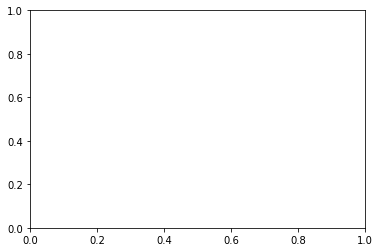

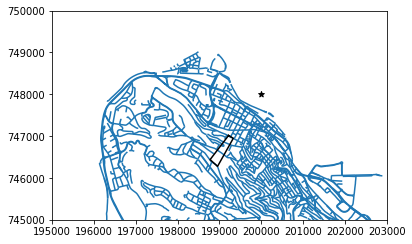

In [14]:
fig, ax = plt.subplots(1,1)
ax = example_roads.plot()
dataHandler.plotGeometry(names=["Haifa_Port", "Bahai_Gardens"], ax=ax)
plt.ylim(745000,750000)
plt.xlim(195000,203000)

## Geometrical Queries

The data can also be querried by geometrical properties.
The default type of querries check if a certain geometry lies entirely within existing datas.
For example, we would define a line that lies entirely within the rectangle of the contour data but some of it is outside the bounds of the other data types.
The query would return only the contour data.

The query is done by addressing a parameter called 'geometry'.

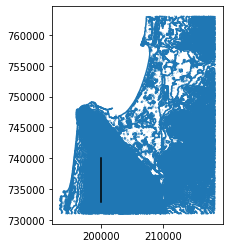

In [17]:
line = geometry.LineString([(200000, 740000), (200000, 733000)])
example_contain = dataHandler.getGISData(Geometry=line)
example_contain.plot()
plt.plot([200000,200000],[733000,740000], color="black")
plt.show()

Another kind of geometrical queries return all the data that intersects with the defined geometry.
It is defined by a parameter called 'GeometryMode'.
The line intersects with all the data types we had saved in the database.
Therefore, all the data should be returned.

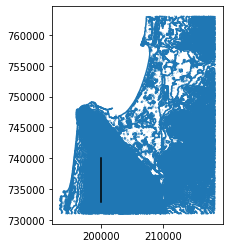

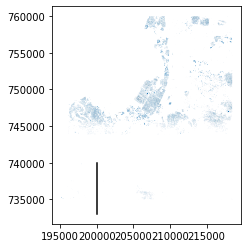

In [18]:
example_intersect = dataHandler.getGISData(Geometry=line, GeometryMode="intersects")
for example in example_intersect:
    example.plot()
    plt.plot([200000,200000],[733000,740000], color="black")
    plt.show()

In addition, a saved shapely geometry name can be given as the geometry.
For example, in the next example all the data that contains Haifa's port is loaded.

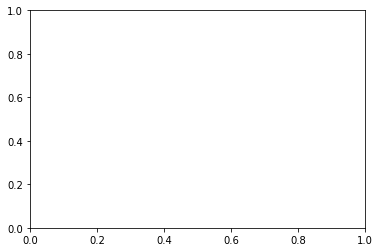

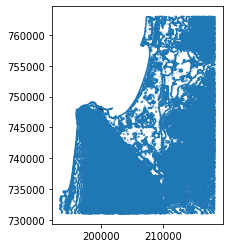

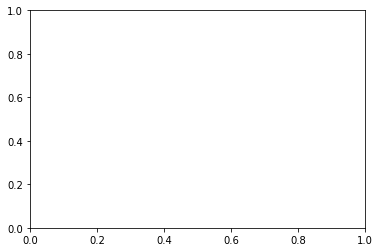

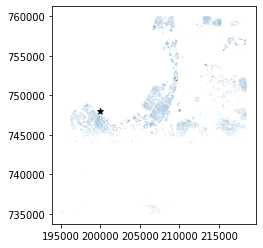

In [24]:
contain_port = dataHandler.getGISData(Geometry="Haifa_Port")
for example in contain_port:
    fig, ax = plt.subplots(1,1)
    ax = example.plot()
    dataHandler.plotGeometry("Haifa_Port", ax=ax)